 4.10 Part 3

More Visualizations

This script includes

#1. Import Libraries and Data

#2. Visualizations

 2.1 Busiest day of the week

 2.2 Busiest hours of the day

 2.3 Time of day customers buy the highest priced items

 2.4 Distribution of customers according to brand loyalty

     2.4.1 Bar chart

     2.4.2 Pie chart

 2.5 Ordering habits based on loyalty status

 2.6 Differences in ordering behavior by region

    2.6.1 Relationship between average total expenditure and income group by region

    2.6.2 Relationship between average total expenditure and age group by region
      
    2.6.3 Relationship between average total expenditure and dependents by region

 2.7 Differences in expenditure for various groups (age,department,income,marital status)

    2.7.1 Total expenditure per age group

    2.7.2 Total expenditure per department for each age group

    2.7.3 Total expenditure per department for each income group

    2.7.4 Total expenditure by marital status

    2.7.5 Total expenditure per department for each marital status
    
 2.8 Ordering Habits for Customer Profiles

    2.8.1 Average order price by customer profile

    2.8.2 Top products ordered by each customer profile

    2.8.3 Preferred order times and days of the week by each customer profile

    2.8.4 Loyalty statuses for each customer profile
    
#3. Export Data

1. Import Libraries and Data

In [169]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [171]:
# import df from 4.10 pt 2
df_ords_prods_customers_merge_pt_one_with_exclusion =pd.read_pickle(r"C:\Users\Owner\Downloads\df_ords_prods_customers_merge_pt_one_with_exclusion(1).pkl")

In [173]:
import pandas as pd

# Dictionary mapping department_id to department names
day_map = {
    0: 'saturday',
    1: 'sunday',
    2: 'monday',
    3: 'tuesday',
    4: 'wednesday',
    5: 'thursday',
    6: 'friday'
    }

# replace the column
df_ords_prods_customers_merge_pt_one_with_exclusion['orders_day_of_week'] = df_ords_prods_customers_merge_pt_one_with_exclusion['orders_day_of_week'].map(day_map)


In [174]:
department_map = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}


    

In [177]:
# Replace department_id with department names
df_ords_prods_customers_merge_pt_one_with_exclusion['department'] = df_ords_prods_customers_merge_pt_one_with_exclusion['department_id'].map(department_map)

# Check the unique values after mapping
unique_departments_after = df_ords_prods_customers_merge_pt_one_with_exclusion['department'].unique()
print("Unique values after mapping:", unique_departments_after)


Unique values after mapping: ['snacks' 'pantry' 'beverages' 'frozen' 'personal care' 'dairy eggs'
 'household' 'babies' 'meat seafood' 'dry goods pasta' 'pets' 'breakfast'
 'canned goods' 'produce' 'missing' 'international' 'deli' 'alcohol'
 'bakery' 'other' 'bulk']


In [186]:
df_ords_prods_customers_merge_pt_one_with_exclusion

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,age_group,region,activity_level,department,dependents_flag,customer_profile,alcohol_status,pet_status,baby_status,total_expenditure
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,friday,...,Senior,Midwest,High-activity customer,snacks,Has dependents,"married, Has dependents",0,0,0,1026.5
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,friday,...,Senior,Midwest,High-activity customer,snacks,Has dependents,"married, Has dependents",0,0,0,1026.5
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,saturday,...,Senior,Northeast,High-activity customer,snacks,Has dependents,"married, Has dependents",0,0,0,1522.6
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,sunday,...,Older adult,West,High-activity customer,snacks,Has dependents,"married, Has dependents",0,0,0,783.7
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,monday,...,Young adult,South,High-activity customer,snacks,Has dependents,"living with parents and siblings, Has dependents",0,0,0,196.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434206,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,prior,10,wednesday,...,Older adult,South,High-activity customer,personal care,Has dependents,"married, Has dependents",0,0,0,1701.2
32434207,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,prior,2,saturday,...,Older adult,Northeast,High-activity customer,personal care,Has dependents,"married, Has dependents",0,0,0,1052.2
32434209,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,prior,5,tuesday,...,Older adult,Midwest,High-activity customer,personal care,Has dependents,"married, Has dependents",0,0,0,2473.6
32434210,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,prior,9,tuesday,...,Older adult,Midwest,High-activity customer,personal care,Has dependents,"married, Has dependents",0,0,0,2473.6


#2. Visualizations

2.1 Busiest day of the week

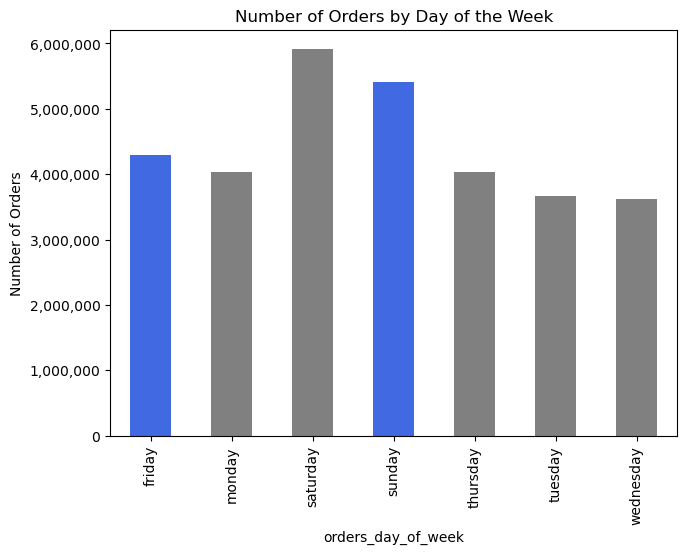

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create a bar chart showing busiest days of the week
plt.title('Number of Orders by Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel('Day of Week')
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.ylabel('Number of Orders')
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))
bar_order_day = df_ords_prods_customers_merge_pt_one_with_exclusion['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['royalblue', 'grey', 'grey', 'royalblue', 'grey', 'grey', 'grey'])
bar_busiest_days_of_week = plt.gcf()

In [12]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_busiest_days_of_week.savefig(os.path.join(path,'bar_busiest_days_of_week.png'), dpi=300, bbox_inches='tight')

2.2 Busiest hours of the day

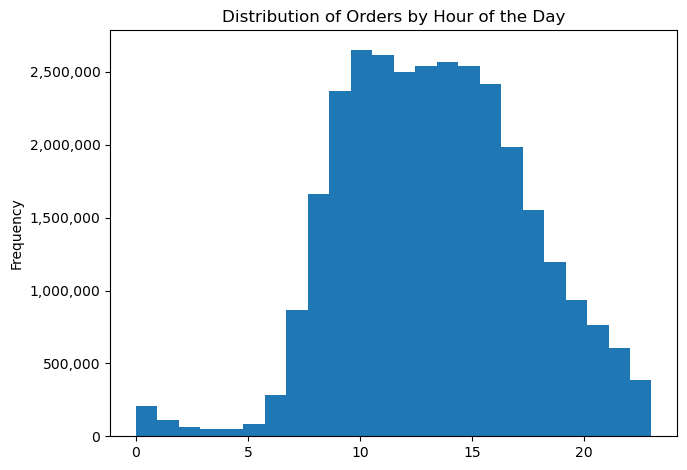

In [14]:
# Create a histogram showing the distribution of sales by order hour of the day
# Set formatting
plt.title('Distribution of Orders by Hour of the Day')
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel('Hour of Day')
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.ylabel('Number of Orders')
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))
# Plot chart
hist_busiest_hour_of_day = df_ords_prods_customers_merge_pt_one_with_exclusion['order_hour_of_day'].plot.hist(bins = 24)
hist_busiest_hour_of_day = plt.gcf()
# Display the plot
plt.show()

In [15]:
# Export chart
path = "../04 Analysis/Visualizations"
hist_busiest_hour_of_day.savefig(os.path.join(path,'hist_busiest_hour_of_day.png'), dpi=300, bbox_inches='tight')

2.3 Time of day customers buy the highest priced items

In [17]:
# Create a representative sample to use in a line plot
np.random.seed(4)
# Create a list holding True/False values to the test np.random.rand()
dev = np.random.rand(len(df_ords_prods_customers_merge_pt_one_with_exclusion)) <= 0.7
# Store 70% of the sample in the dataframe big
big = df_ords_prods_customers_merge_pt_one_with_exclusion[dev]
# Store 30% of the sample in the dataframe small
small = df_ords_prods_customers_merge_pt_one_with_exclusion[~dev]

In [18]:
len(big) + len(small)

30992664

In [19]:
# Create dataframe containing 'order_hour__day' + 'prices' columns
df_ords_prods_customers_merge_pt_one_with_exclusion_sample = small[['order_hour_of_day', 'prices']]

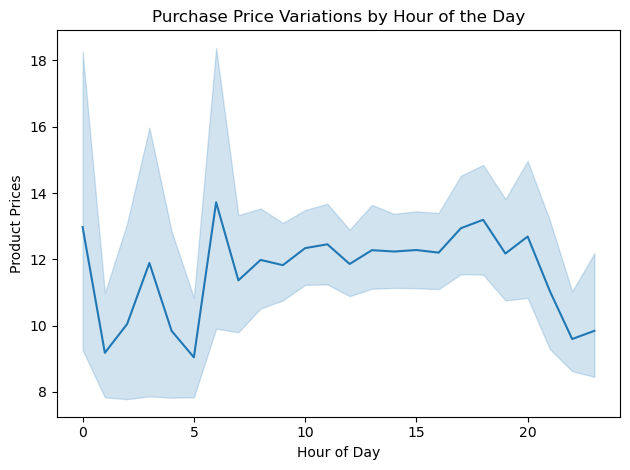

In [20]:
# Create line chart showing prices +order_hour_of_day
line_prices_order_hour = sns.lineplot(data = df_ords_prods_customers_merge_pt_one_with_exclusion_sample, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('Hour of Day')
plt.ylabel('Product Prices')
plt.title('Purchase Price Variations by Hour of the Day')
plt.tight_layout()
line_prices_order_hour = plt.gcf()
# Display the plot
plt.show()

In [21]:
# Export chart
path = "../04 Analysis/Visualizations"
line_prices_order_hour.savefig(os.path.join(path, 'line_prices_order_hour.png'), dpi=300, bbox_inches='tight')

2.4 Distribution of users according to brand loyalty

2.4.1 Bar chart

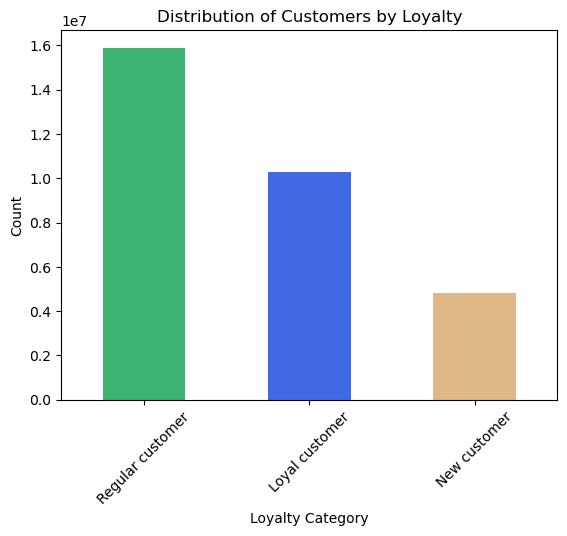

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Create bar chart on 'loyalty_flag' frequency
# Plot chart
bar_loyalty = df_ords_prods_customers_merge_pt_one_with_exclusion['loyalty_flag'].value_counts().plot.bar(color = ['mediumseagreen', 'royalblue', 'burlywood'])
# Set formatting
plt.title('Distribution of Customers by Loyalty')
plt.ylabel('Count')
def value_formatter(x, pos):
    return f'{x:,.0f}'
    plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.xlabel('Loyalty Category')
plt.xticks(rotation=45)
bar_loyalty = plt.gcf()

In [25]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_loyalty.savefig(os.path.join(path, 'bar_loyalty.png'), dpi=300, bbox_inches='tight')

2.4.2 Pie chart

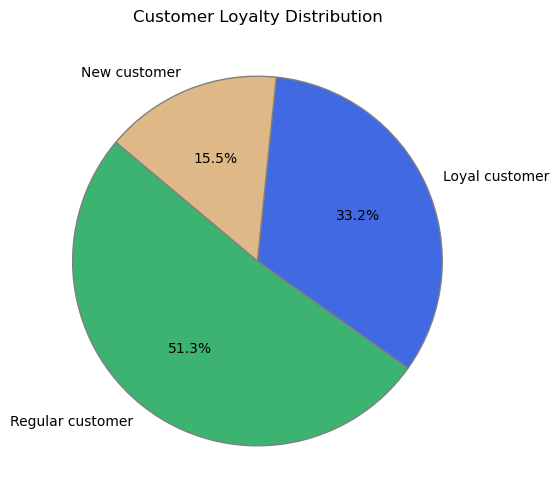

In [27]:
# Create pie chart on loyalty_flag
# Frequency of each loyalty category
loyalty_counts = df_ords_prods_customers_merge_pt_one_with_exclusion['loyalty_flag'].value_counts()
# Color parameters and wedge properties
colors = ('mediumseagreen', 'royalblue', 'burlywood')
wp = {'linewidth': 1, 'edgecolor': 'grey'}
# Creating plot
fig,ax = plt.subplots(figsize = (8, 6))
ax.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=wp)
#Set title
ax.set_title('Customer Loyalty Distribution')
pie_loyalty = plt.gcf()

In [28]:
# Export chart
path = "../04 Analysis/Visualizations"
pie_loyalty.savefig(os.path.join(path, 'pie_loyalty.png'), dpi=300, bbox_inches='tight')

2.5 Ordering habits based on loyalty status

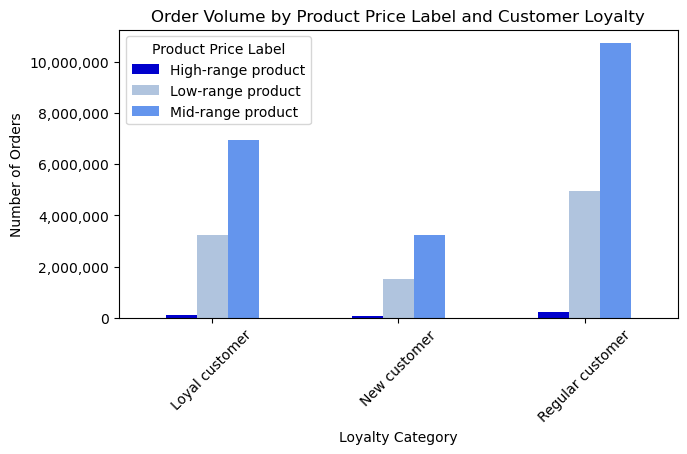

In [30]:
# Frequency of low-range, mid-range, or high-range product purchases by loyalty status
# Create a dataframe that contains the counts for each price_label for each loyalty group
grouped_data = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['loyalty_flag', 'price_range_loc']).size().unstack(fill_value=0)
# Custom colors
colors = ['mediumblue', 'lightsteelblue', 'cornflowerblue']
# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=False, color=colors)
plt.title('Order Volume by Product Price Label and Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Product Price Label')
plt.tight_layout()
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))
product_price_range_by_loyalty = plt.gcf()

In [31]:
# Export chart
path = "../04 Analysis/Visualizations"
product_price_range_by_loyalty.savefig(os.path.join(path, 'product_price_range_by_loyalty.png'), dpi=300, bbox_inches='tight')

2.6 Differences in ordering habits by region

2.6.1 Relationship between average total expenditure and income group by region

In [34]:
# Group by region+ income group then calculate the average total spending
avg_spending_by_region_income = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['region', 'income_group'])['total_expenditure'].mean().reset_index()

In [35]:
avg_spending_by_region_income

,region,income_group,total_expenditure
0,Midwest,High_income,7187.274221
1,Midwest,Low_income,2428.378088
2,Midwest,Middle_income,3702.879813
3,Northeast,High_income,6492.319113
4,Northeast,Low_income,2428.810070
5,Northeast,Middle_income,3677.965041
6,South,High_income,6705.857491
7,South,Low_income,2657.782955
8,South,Middle_income,3727.494813
9,West,High_income,5798.466087


In [36]:
# Pivot the data for heatmap visualization
pivot_data = avg_spending_by_region_income.pivot(index='region', columns='income_group', values='total_expenditure')

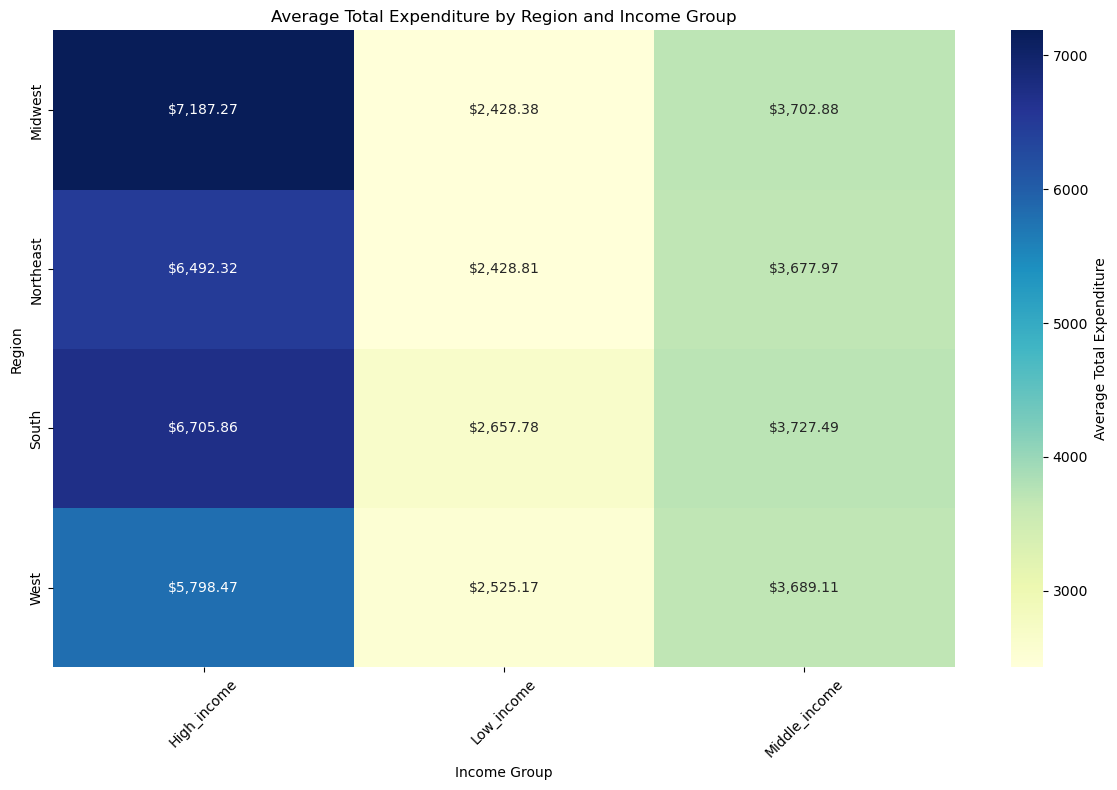

In [37]:
# Set custom value formatting
def fmt_dollar_comma(x):
    return f'${x:,.2f}'

# Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Average Total Expenditure by Region and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Region')
plt.xticks(rotation=45)

# Adjust the colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Average Total Expenditure')

# Apply the custom formatting to the values
for text in ax.texts:
    value = float(text.get_text())
    text.set_text(fmt_dollar_comma(value))

plt.tight_layout()
heatmap_avg_expenditure_region_income = plt.gcf()


In [38]:
# Export chart
path = "../04 Analysis/Visualizations"
heatmap_avg_expenditure_region_income.savefig(os.path.join(path, 'heatmap_avg_expediture_region_income.png'), dpi=300, bbox_inches='tight')

2.6.2 Relationship between average total expenditure and age group by region

In [40]:
# Group by region + age group, calculate the avg total expenditure
avg_expenditure_by_region_age = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['region', 'age_group'])['total_expenditure'].mean().reset_index()

In [41]:
# Pivot the data for heatmap visualization
pivot_data_age = avg_expenditure_by_region_age.pivot(index='region', columns='age_group', values='total_expenditure')

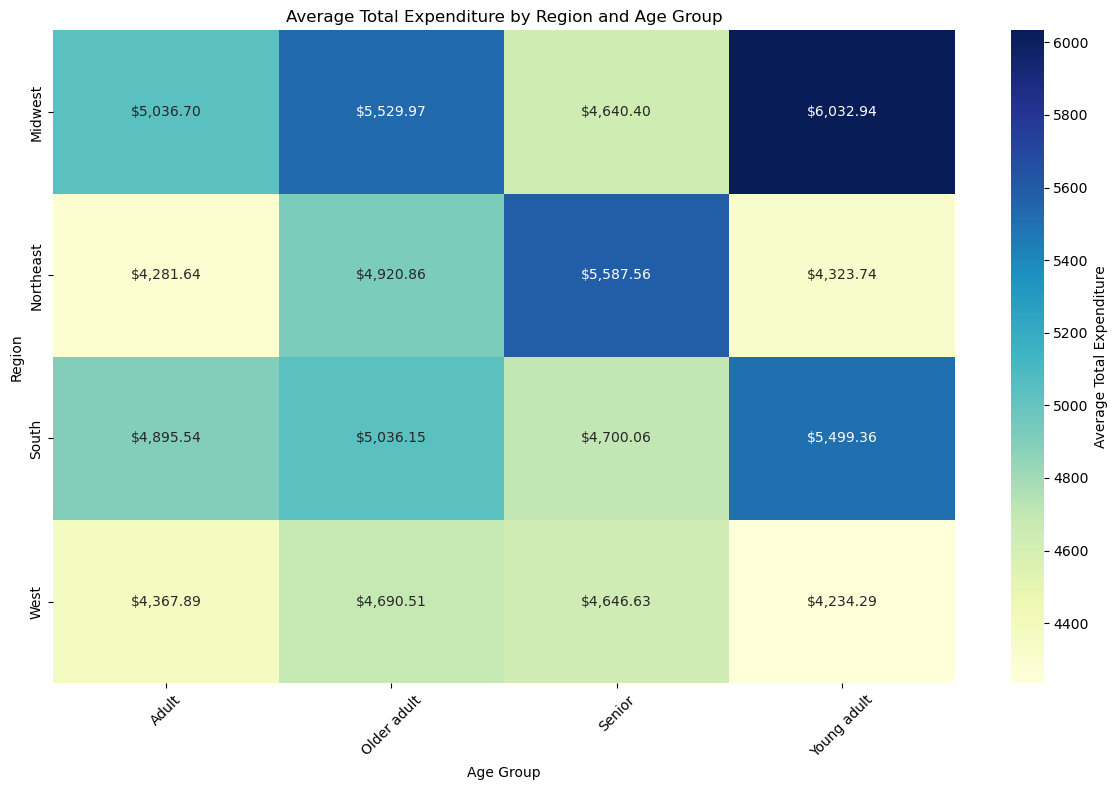

In [42]:
# Set custom value formatting
def fmt_dollar_comma(x):
    return f'${x:,.2f}'

# Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data_age, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Average Total Expenditure by Region and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Region')
plt.xticks(rotation=45)

# Adjust the colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Average Total Expenditure')

# Apply the custom formatting to the values
for text in ax.texts:
    value = float(text.get_text())
    text.set_text(fmt_dollar_comma(value))

plt.tight_layout()
heatmap_avg_expenditure_region_age = plt.gcf()


In [43]:
# Export chart
path = "../04 Analysis/Visualizations"
heatmap_avg_expenditure_region_age.savefig(os.path.join(path,'heatmap_avg_expediture_region_age.png'), dpi=300, bbox_inches='tight')

2.6.3 Relationship between average total expenditure and dependents by region

In [45]:
# Group by region + dependents group, calculate the average total expenditure
avg_expenditure_by_region_dependents = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['region', 'dependents_flag'])['total_expenditure'].mean().reset_index()

In [46]:
# Pivot the data for heatmap visualization
pivot_data_dependents = avg_expenditure_by_region_dependents.pivot(index='region', columns='dependents_flag', values='total_expenditure')

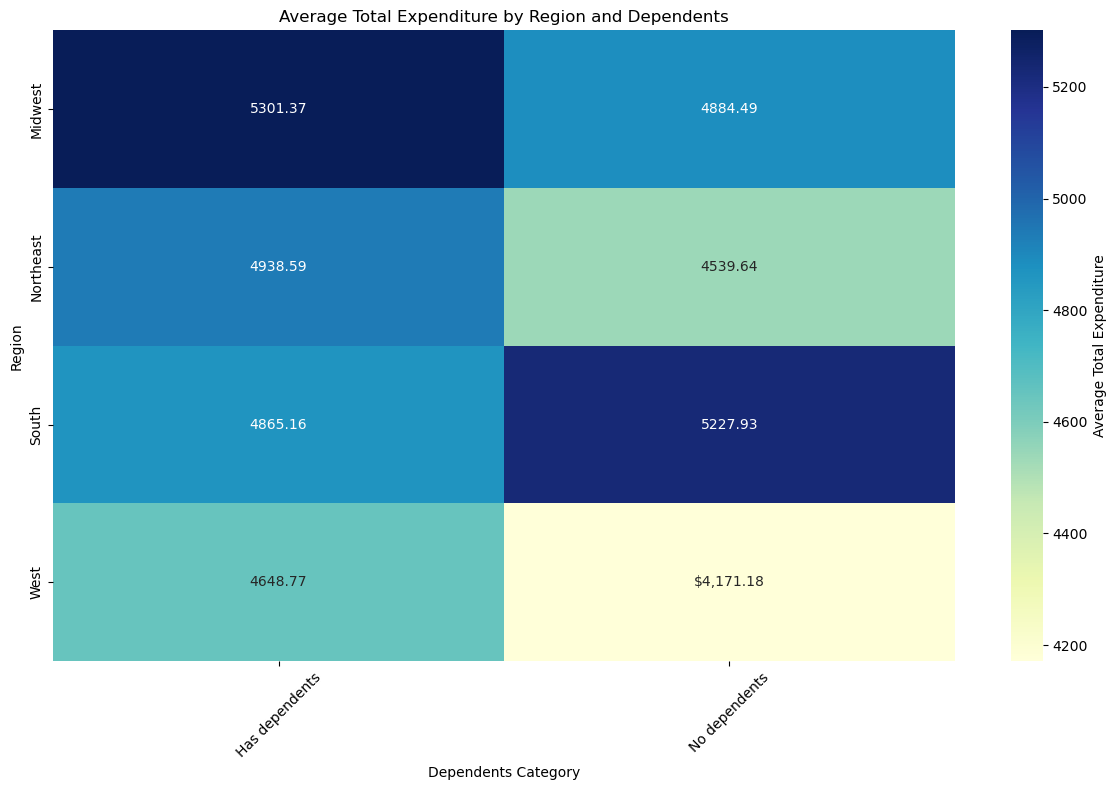

In [47]:
# Set custom value formatting
def fmt_dollar_comma(x):
    return f'${x:,.2f}'
# Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data_dependents, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Average Total Expenditure by Region and Dependents')
plt.xlabel('Dependents Category')
plt.ylabel('Region')
plt.xticks(rotation=45)
# Adjust the colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Average Total Expenditure')
# Apply the custom formatting to the values
for text in ax.texts:
    value = float(text.get_text())
text.set_text(fmt_dollar_comma(value))
plt.tight_layout()
heatmap_avg_expediture_region_dependents = plt.gcf()

In [48]:
# Export chart
path = "../04 Analysis/Visualizations"
heatmap_avg_expediture_region_dependents.savefig(os.path.join(path,'heatmap_avg_expediture_region_dependents.png'), dpi=300, bbox_inches='tight')

 2.7 Differences in expenditure for various groups

2.7.1 Total expenditure per age group

In [51]:
total_expenditure_age_group = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby('age_group')['total_expenditure'].sum().reset_index()

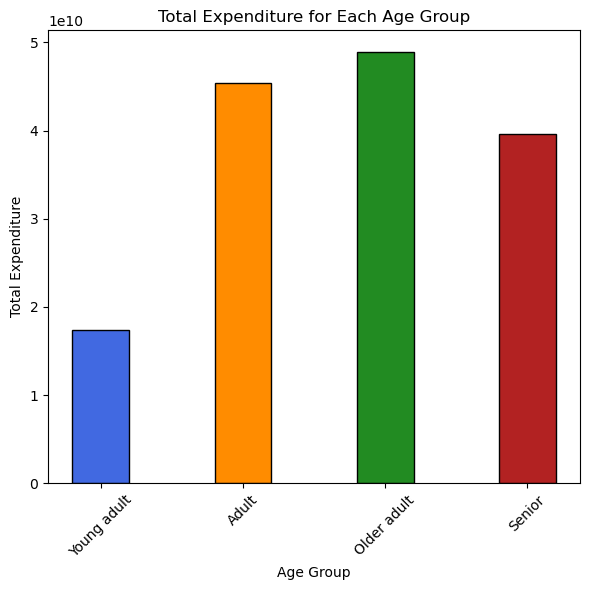

In [52]:
# Ensure age groups are in the desired order
age_groups_order = ['Young adult', 'Adult', 'Older adult', 'Senior']
total_expenditure_age_group['age_group'] = pd.Categorical(total_expenditure_age_group['age_group'], categories=age_groups_order, ordered=True)
total_expenditure_age_group = total_expenditure_age_group.sort_values('age_group')
# Define custom colors for age groups
colors = ['royalblue', 'darkorange', 'forestgreen', 'firebrick']
# Create a bar plot for each age group
plt.figure(figsize=(6, 6))
bar_total_expenditure_age = plt.bar(total_expenditure_age_group['age_group'], total_expenditure_age_group['total_expenditure'], width=0.4, edgecolor='black', color=colors)
plt.title('Total Expenditure for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.tight_layout()
bar_total_expenditure_age = plt.gcf()

In [53]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_total_expenditure_age.savefig(os.path.join(path, 'bar_total_expenditure_age.png'), dpi=300, bbox_inches='tight')

2.7.2 Total expenditure per department for each age group

In [55]:
# Group by age group and department_name, calculate the total expenditure
total_expenditure_by_age_dept = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['age_group', 'department'])['total_expenditure'].sum().unstack(fill_value=0)

In [56]:
# Transpose the DataFrame to switch rows and columns
total_expenditure_by_dept_age = total_expenditure_by_age_dept.T

In [57]:
total_expenditure_by_dept_age

age_group,Adult,Older adult,Senior,Young adult
department,,,,
alcohol,2.447691e+08,3.143890e+08,4.419898e+08,1.068103e+08
babies,6.307988e+08,7.999437e+08,5.310821e+08,3.434634e+08
bakery,1.923530e+09,1.980315e+09,1.656063e+09,6.654472e+08
beverages,3.609725e+09,4.312276e+09,3.423325e+09,1.460532e+09
breakfast,1.104753e+09,1.262906e+09,1.129300e+09,5.132964e+08
bulk,4.481574e+07,3.799329e+07,3.377489e+07,1.497817e+07
canned goods,1.460027e+09,1.556639e+09,1.296946e+09,5.825908e+08
dairy eggs,7.970834e+09,8.610463e+09,6.880540e+09,3.103881e+09
deli,1.397679e+09,1.608360e+09,1.207589e+09,5.003343e+08


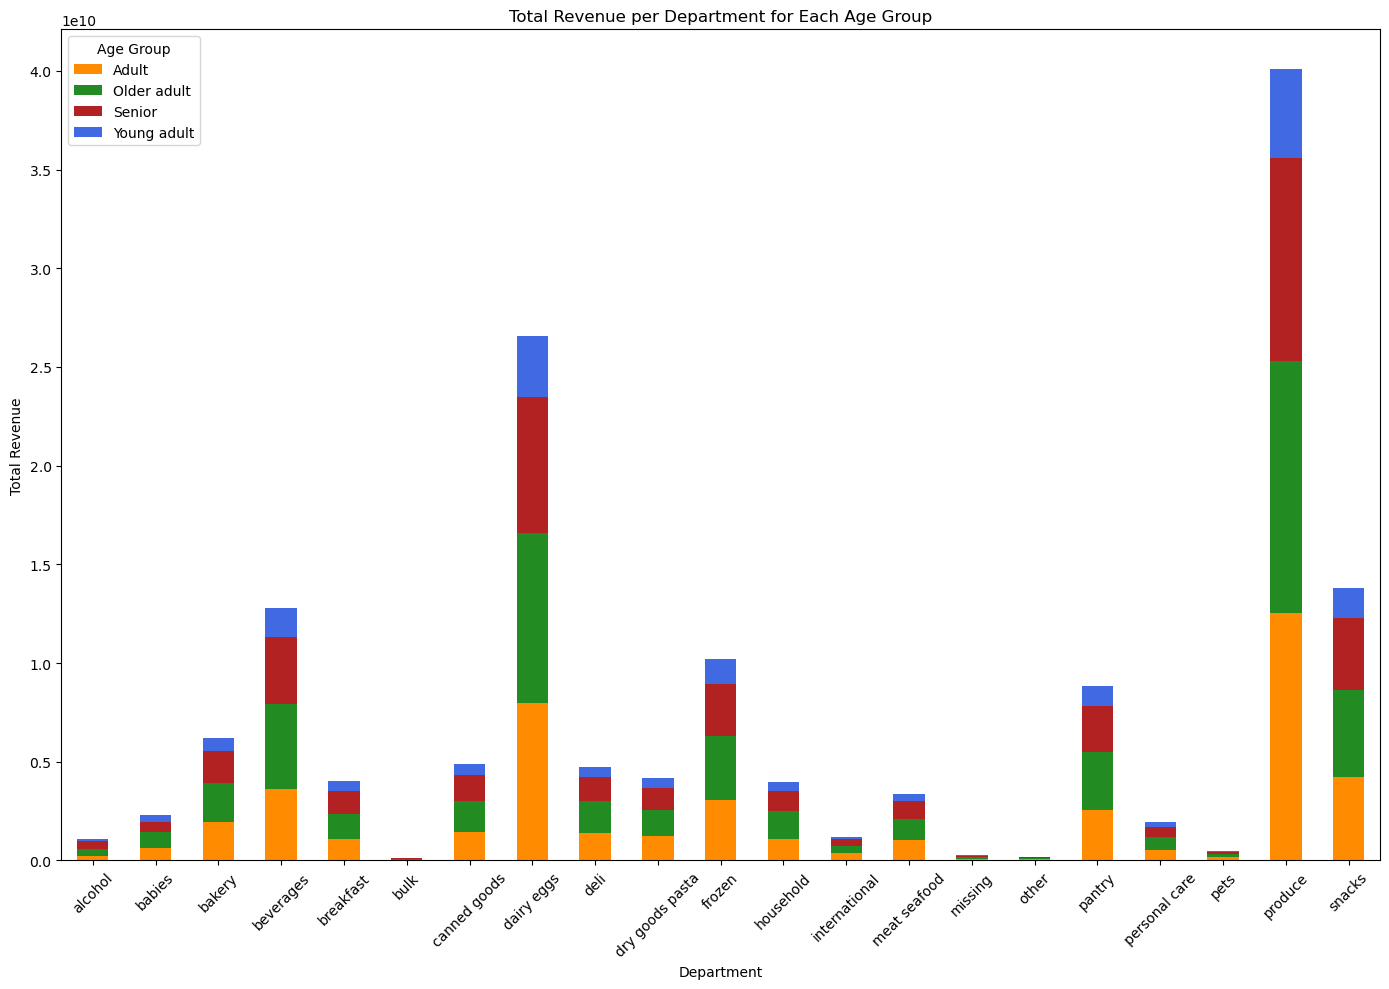

In [58]:
# Create custom colors for age groups
colors = {'Young adult': 'royalblue', 'Adult': 'darkorange', 'Older adult': 'forestgreen', 'Senior': 'firebrick'}
# Create a bar plot for each age group
total_expenditure_by_dept_age.plot(kind='bar', stacked=True, figsize=(14, 10), color=[colors[group] for group in total_expenditure_by_dept_age.columns])
plt.title('Total Revenue per Department for Each Age Group')
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
bar_total_revenue_age_department = plt.gcf()

In [59]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_total_revenue_age_department.savefig(os.path.join(path, 'bar_total_revenue_age_department.png'), dpi=300, bbox_inches='tight')

2.7.3 Total expenditure per department for each income group

In [61]:
# Group by age group + department_name, calculate the total expenditure
total_expenditure_by_income_dept = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['income_group', 'department'])['total_expenditure'].sum().unstack(fill_value=0)

In [62]:
# Transpose the DF to switch rows and columns
total_expenditure_by_dept_income = total_expenditure_by_income_dept.T

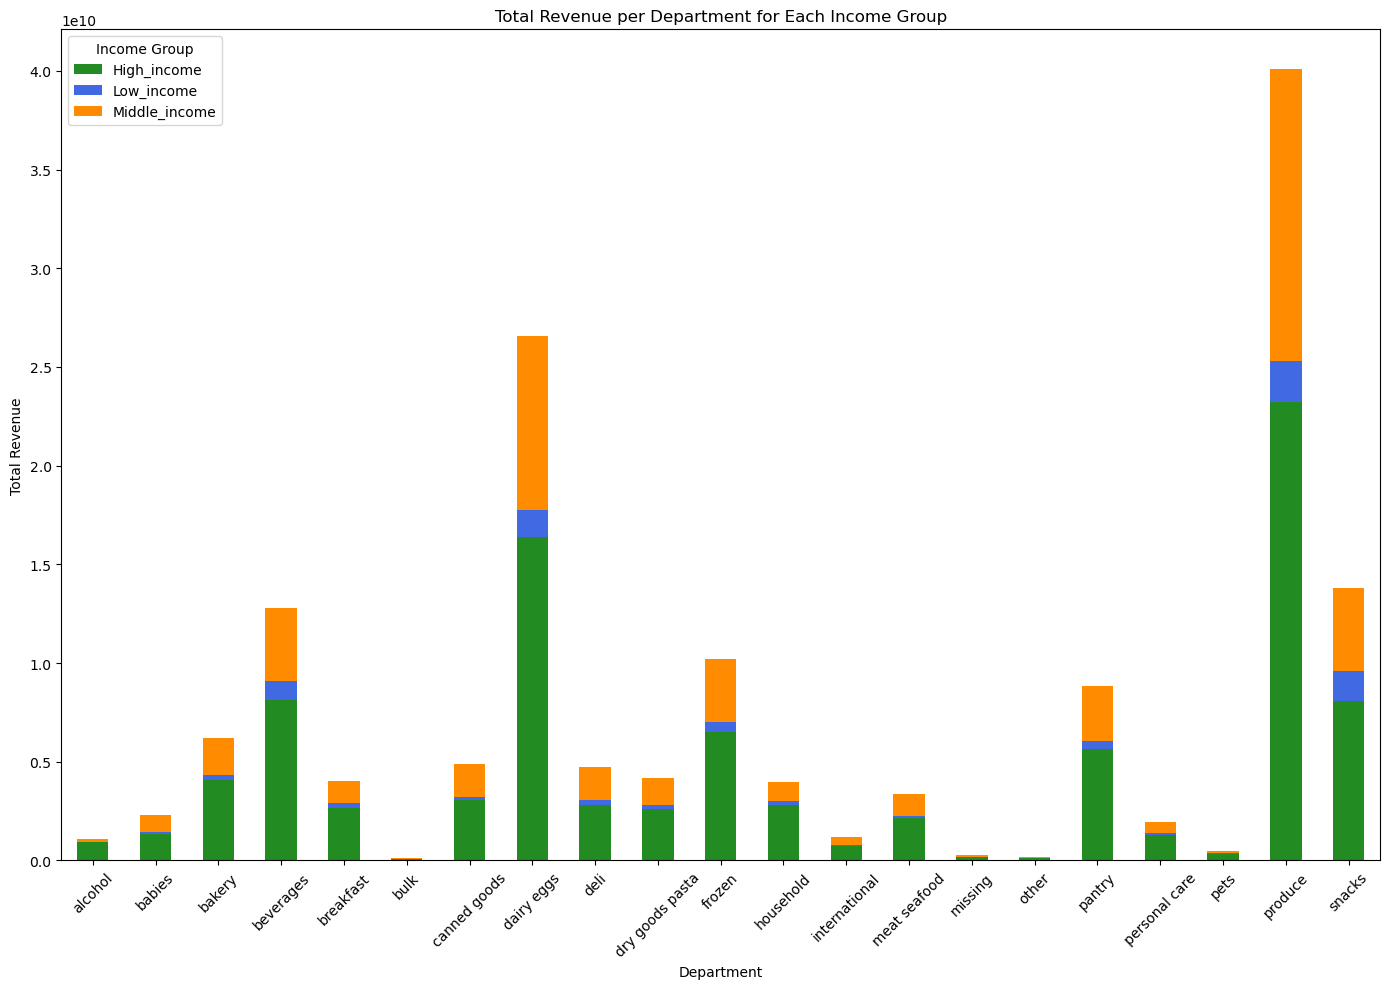

In [63]:
# Create custom colors for income groups
colors = {'Low_income': 'royalblue', 'Middle_income': 'darkorange', 'High_income': 'forestgreen'}
# Create a bar plot for each age group
total_expenditure_by_dept_income.plot(kind='bar', stacked=True, figsize=(14, 10), color=[colors[group] for group in total_expenditure_by_dept_income.columns])
plt.title('Total Revenue per Department for Each Income Group')
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()
bar_total_revenue_income_department = plt.gcf()

In [64]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_total_revenue_income_department.savefig(os.path.join(path, 'bar_total_revenue_income_department.png'), dpi=300, bbox_inches='tight')

2.7.4 Total expenditure by family status

In [66]:
total_expenditure_marital_status = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby('marital_status')['total_expenditure'].sum().reset_index()

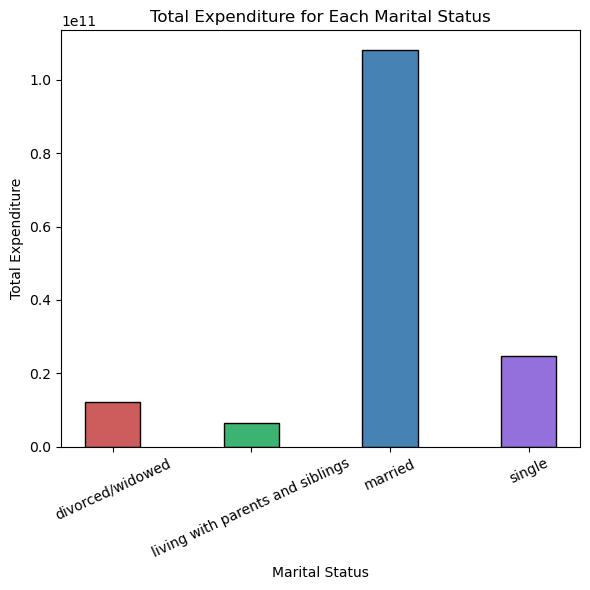

In [67]:
# Define custom colors for age groups\n",
colors = ['indianred', 'mediumseagreen', 'steelblue', 'mediumpurple']
# Create a bar plot for each age group
plt.figure(figsize=(6, 6))
bar_total_expenditure_marital_status = plt.bar(total_expenditure_marital_status['marital_status'], total_expenditure_marital_status['total_expenditure'], width=0.4, edgecolor='black', color=colors)
plt.title('Total Expenditure for Each Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=25)
plt.tight_layout()
bar_total_expenditure_marital_status = plt.gcf()

In [68]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_total_expenditure_marital_status.savefig(os.path.join(path, 'bar_total_expenditure_marital_status.png'), dpi=300, bbox_inches='tight')

2.7.5 Total expenditure per department for each family status

In [70]:
# Group by family status and department_name, calculate the total expenditure
total_expenditure_by_marital_stat_dept = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['marital_status', 'department'])['total_expenditure'].sum().unstack(fill_value=0)

In [71]:
# Transpose the DataFrame to switch rows and columns
total_expenditure_by_dept_marital_stat = total_expenditure_by_marital_stat_dept.T

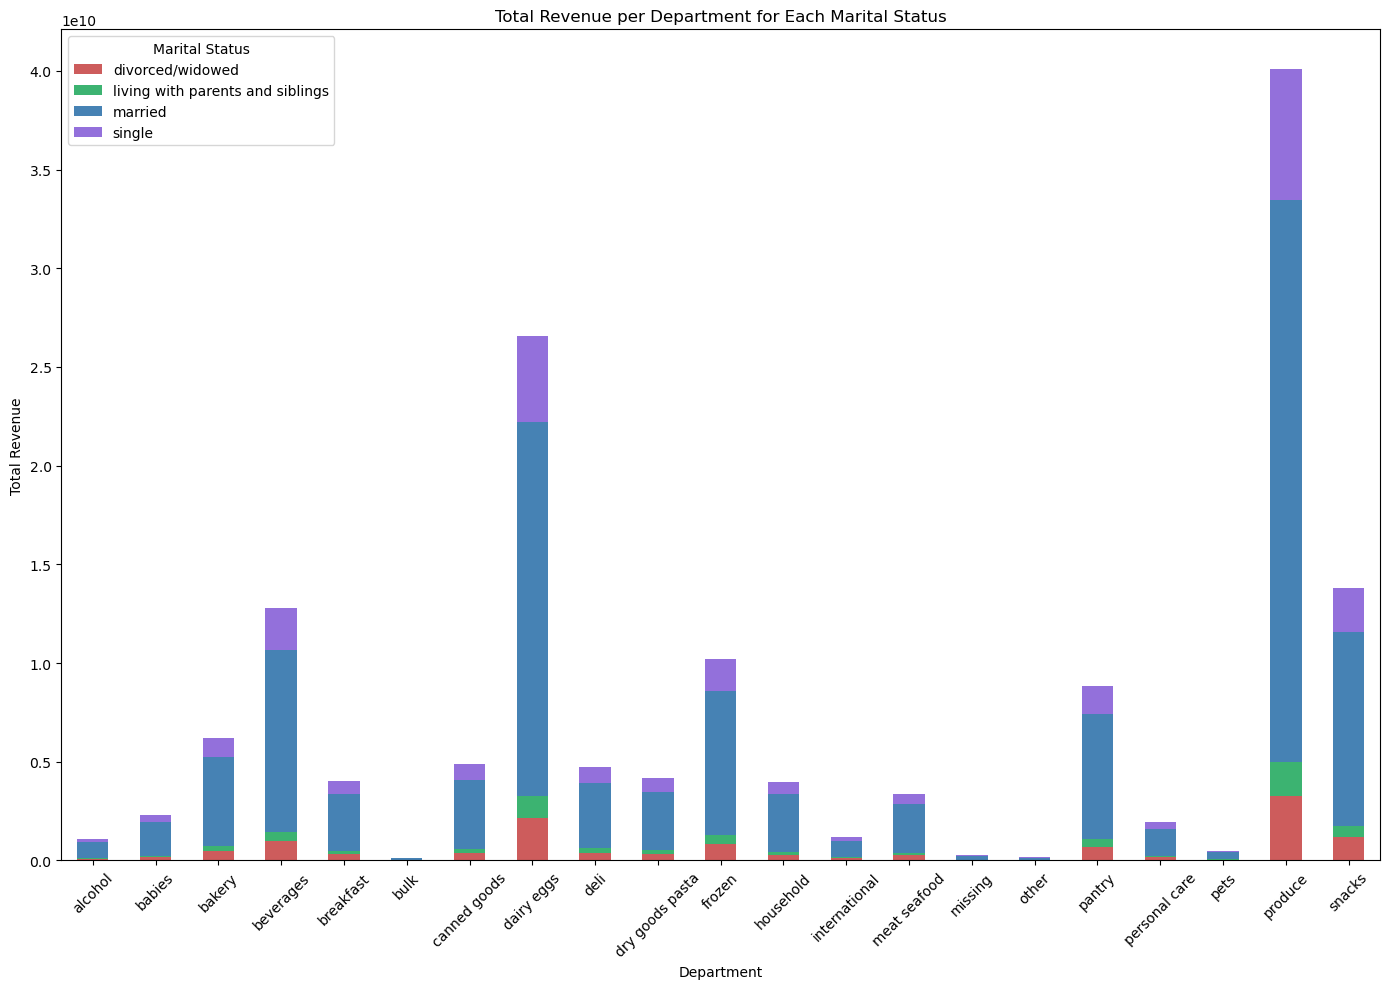

In [72]:
# Create custom colors for income groups
colors = {'divorced/widowed': 'indianred', 'living with parents and siblings': 'mediumseagreen', 'married': 'steelblue', 'single': 'mediumpurple'}
# Create a bar plot for each age group\n",
total_expenditure_by_dept_marital_stat.plot(kind='bar', stacked=True, figsize=(14, 10), color=[colors[group] for group in total_expenditure_by_dept_marital_stat.columns])
plt.title('Total Revenue per Department for Each Marital Status')
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.tight_layout()
bar_total_revenue_marital_status_department = plt.gcf()

In [73]:
#Export chart
path = "../04 Analysis/Visualizations"
bar_total_revenue_marital_status_department.savefig(os.path.join(path, 'bar_total_revenue_marital_status_department.png'), dpi=300, bbox_inches='tight')

2.8 Ordering Habits for Customer Profiles

2.8.1 Average Order Price by Customer Profile

In [76]:
# Calculate the average price of orders for each customer profile
average_order_price = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby('customer_profile')['prices'].mean().reset_index()
average_order_price.columns = ['Customer Profile', 'Average Order Price']
print(average_order_price)

                                   Customer Profile  Average Order Price
0                   divorced/widowed, No dependents            11.534215
1  living with parents and siblings, Has dependents            10.892382
2                           married, Has dependents            11.945319
3                             single, No dependents            12.399074


2.8.2 Top products ordered by each customer profile

In [78]:
# Count the occurrences of each department within each customer profile
product_preferences = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['customer_profile', 'product_name']).size().reset_index(name='counts')
# Get the top products for each customer profile
top_products = product_preferences.groupby('customer_profile').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_14352\1539983812.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = product_preferences.groupby('customer_profile').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)


In [79]:
top_products.to_clipboard()

2.8.3 Preferred order times and days of the week by each customer profile

C:\Users\Owner\AppData\Local\Temp\ipykernel_14352\1795152971.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_day = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['customer_profile', 'orders_day_of_week']).size().unstack().fillna(0)


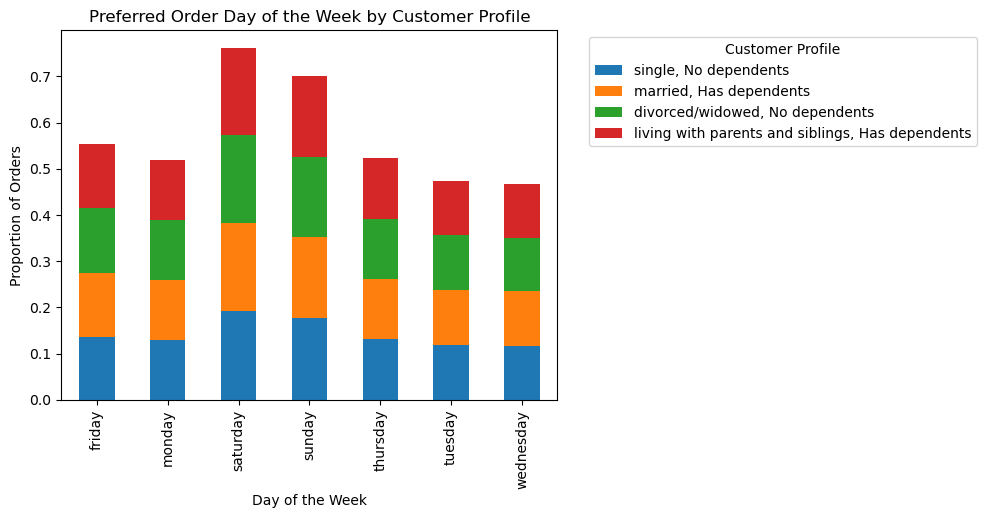

In [81]:
# Ensure 'customer_profile' is a categorical column with the specified order\n",
customer_profile_order = ['single, No dependents', 'married, Has dependents', 'divorced/widowed, No dependents', 'living with parents and siblings, Has dependents']
df_ords_prods_customers_merge_pt_one_with_exclusion['customer_profile'] = pd.Categorical(df_ords_prods_customers_merge_pt_one_with_exclusion['customer_profile'], categories=customer_profile_order, ordered=True)
# Calculate the preferred order day of the week for each customer profile
order_day = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['customer_profile', 'orders_day_of_week']).size().unstack().fillna(0)
order_day = order_day.div(order_day.sum(axis=1), axis=0)
# Plotting preferred order day of the week
ax = order_day.T.plot(kind='bar', stacked=True)
plt.title('Preferred Order Day of the Week by Customer Profile')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Orders')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1.0), loc='upper left')
bar_order_day_customer_profile = plt.gcf()

In [82]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_order_day_customer_profile.savefig(os.path.join(path, 'bar_order_day_customer_profile.png'), dpi=300, bbox_inches='tight')

C:\Users\Owner\AppData\Local\Temp\ipykernel_14352\1337049166.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_hour = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['customer_profile', 'order_hour_of_day']).size().unstack().fillna(0)


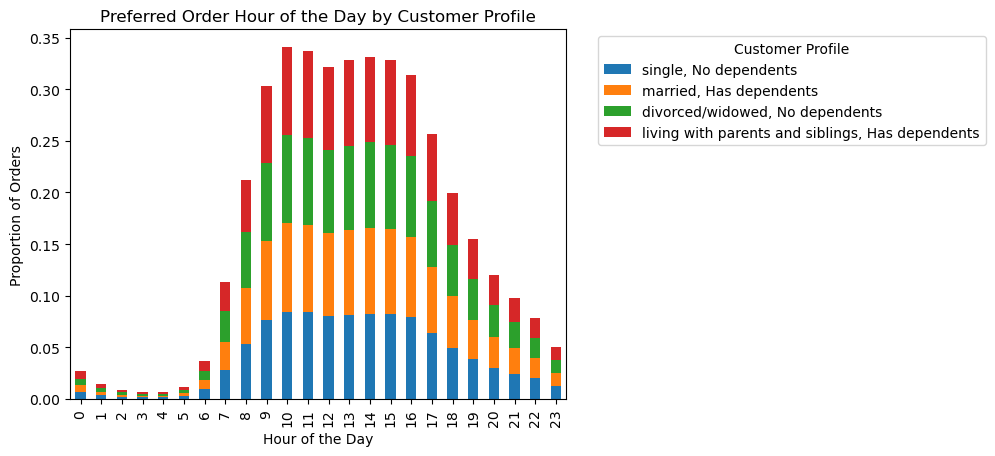

In [83]:
# Ensure 'customer_profile' is a categorical column with the specified order
customer_profile_order = ['single, No dependents', 'married, Has dependents', 'divorced/widowed, No dependents', 'living with parents and siblings, Has dependents']
df_ords_prods_customers_merge_pt_one_with_exclusion['customer_profile'] = pd.Categorical(df_ords_prods_customers_merge_pt_one_with_exclusion['customer_profile'], categories=customer_profile_order, ordered=True)
# Calculate the preferred order hour of the day for each customer profile
order_hour = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['customer_profile', 'order_hour_of_day']).size().unstack().fillna(0)
order_hour = order_hour.div(order_hour.sum(axis=1), axis=0)
# Plotting preferred order hour of the day
order_hour.T.plot(kind='bar', stacked=True)
plt.title('Preferred Order Hour of the Day by Customer Profile')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion of Orders')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1.0), loc='upper left')
bar_order_hour_customer_profile = plt.gcf()

In [84]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_order_hour_customer_profile.savefig(os.path.join(path,'bar_order_hour_customer_profile.png'), dpi=300, bbox_inches='tight')

2.8.4 Loyalty statuses for each customer profile

In [86]:
# Count the occurrences of each loyalty_flag within each customer profile
loyalty_counts = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['customer_profile', 'loyalty_flag']).size().unstack().fillna(0)

# Calculate the proportion of loyalty_flags for each customer profile
loyalty_proportions = loyalty_counts.div(loyalty_counts.sum(axis=1), axis=0)


C:\Users\Owner\AppData\Local\Temp\ipykernel_14352\2189883192.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loyalty_counts = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['customer_profile', 'loyalty_flag']).size().unstack().fillna(0)


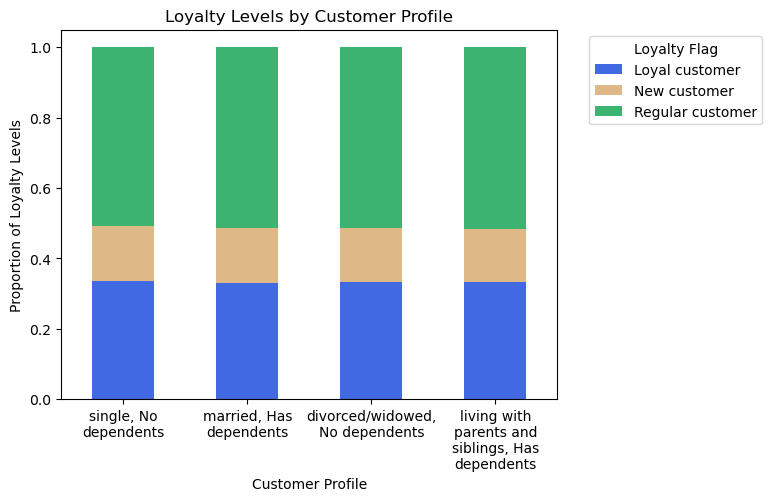

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Set custom coloring
colors = ['royalblue', 'burlywood', 'mediumseagreen']

# Function to wrap text
def wrap_labels(ax, max_char):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped_text = "\n".join(textwrap.wrap(text, max_char))
        labels.append(wrapped_text)
    ax.set_xticklabels(labels, rotation=0, ha='center')

# Create stacked bar chart
ax = loyalty_proportions.plot(kind='bar', stacked=True, color=colors)
plt.title('Loyalty Levels by Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Proportion of Loyalty Levels')
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Wrap x-axis Labels to a maximum of 17 characters per line
wrap_labels(ax, 17)

# Save the figure
stackedbar_loyalty_customer_profile = plt.gcf()
plt.show()


In [88]:
# Export chart
path = "../04 Analysis/Visualizations"
stackedbar_loyalty_customer_profile.savefig(os.path.join(path, 'stackedbar_loyalty_customer_profile.png'), dpi=300, bbox_inches='tight')

In [89]:
df_ords_prods_customers_merge_pt_one_with_exclusion['price_range_loc'].nunique()

3

In [90]:
df_ords_prods_customers_merge_pt_one_with_exclusion['product_id'].nunique()

49644

In [91]:
# Count unique product_id within each price label
unique_product_counts = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby('price_range_loc')['product_id'].nunique()

In [92]:
unique_product_counts

price_range_loc
High-range product      548
Low-range product     16281
Mid-range product     32816
Name: product_id, dtype: int64

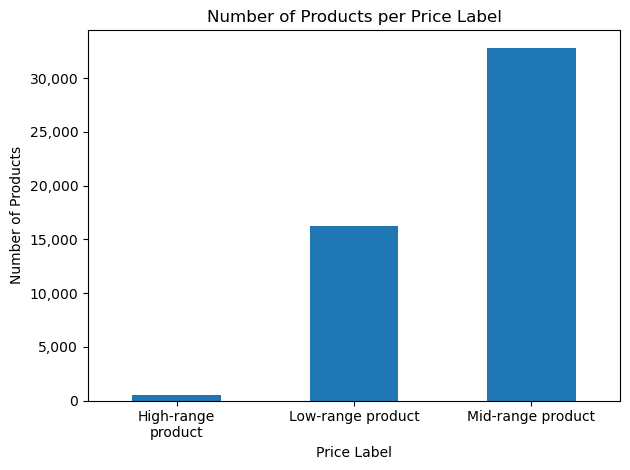

In [93]:
# Create a bar chart showing the number of products in each price_label category
ax = unique_product_counts.plot.bar()
plt.title('Number of Products per Price Label')
plt.xlabel('Price Label')
plt.ylabel('Number of Products')
# Format y-axis values
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))
# Wrap text labels
labels = [textwrap.fill(label, width=17) for label in unique_product_counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, ha='center')
plt.tight_layout()
bar_price_label_distribution = plt.gcf()

In [181]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_price_label_distribution.savefig(os.path.join(path,'bar_price_label_distribution.png'), dpi=300, bbox_inches='tight')

 3. Export Data

In [183]:
# Export Final Dataset
path = "../02 Data/Prepared Data"
df_ords_prods_customers_merge_pt_one_with_exclusion.to_pickle(os.path.join(path, 'df_ords_prods_customers_merge_w_exclusion_final.pkl'))